# SVM Theory - Duality  

In [1]:
%matplotlib notebook

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import SVC

In [4]:
X = [x for x in range(-10,10)]
X_valid = []
Y = []
for x in X:
    if 3*x-1 <=0:
        X_valid.append(x)
        Y.append((x-1)**2)
    

    
fig = plt.figure()
plt.scatter(X_valid,Y)
plt.scatter(1/3, (1/3-1)**2)
plt.show()


<IPython.core.display.Javascript object>

Our optimization problem is given by a quadratic function opened upwards, which is a convex function. Therefore our optimization problem is convex even when the feasible set reduces the input space of the function.
Looking at the plot you can see that the connecting line between any two points lies above the function, which represents the definition of a convex function.

### Optimization with Lagrangian 

$$L(x,\alpha) = (x-1)^2 - \alpha(-3x+1)$$

$$\frac{\partial L}{\partial x} = 2(x-1) + 3\alpha$$

$$\frac{\partial L}{\partial \alpha} = 3x-1 $$


Set the derivative with respect to x equal to zero:

\begin{align*} 2(x-1) + 3\alpha &= 0 \\ x &= -\frac{3}{2} \alpha +1  \hspace{1cm}\text{(*)}\end{align*}

Substituting this into the derivative with respect to $\alpha$ and set it to zero:

\begin{align*} 3x - 1 &= 0 \\ 3(-\frac{3}{2} \alpha +1) -1 &= 0 \\ -\frac{9}{2}\alpha + 2 = 0 \\ \alpha = \frac{4}{9} \end{align*}

The stationary point for L is given by:   ($x = -\frac{3}{2} \cdot (\frac{4}{9}) + 1 = \frac{1}{3}$ , $\alpha=\frac{4}{9}$)

<IPython.core.display.Javascript object>


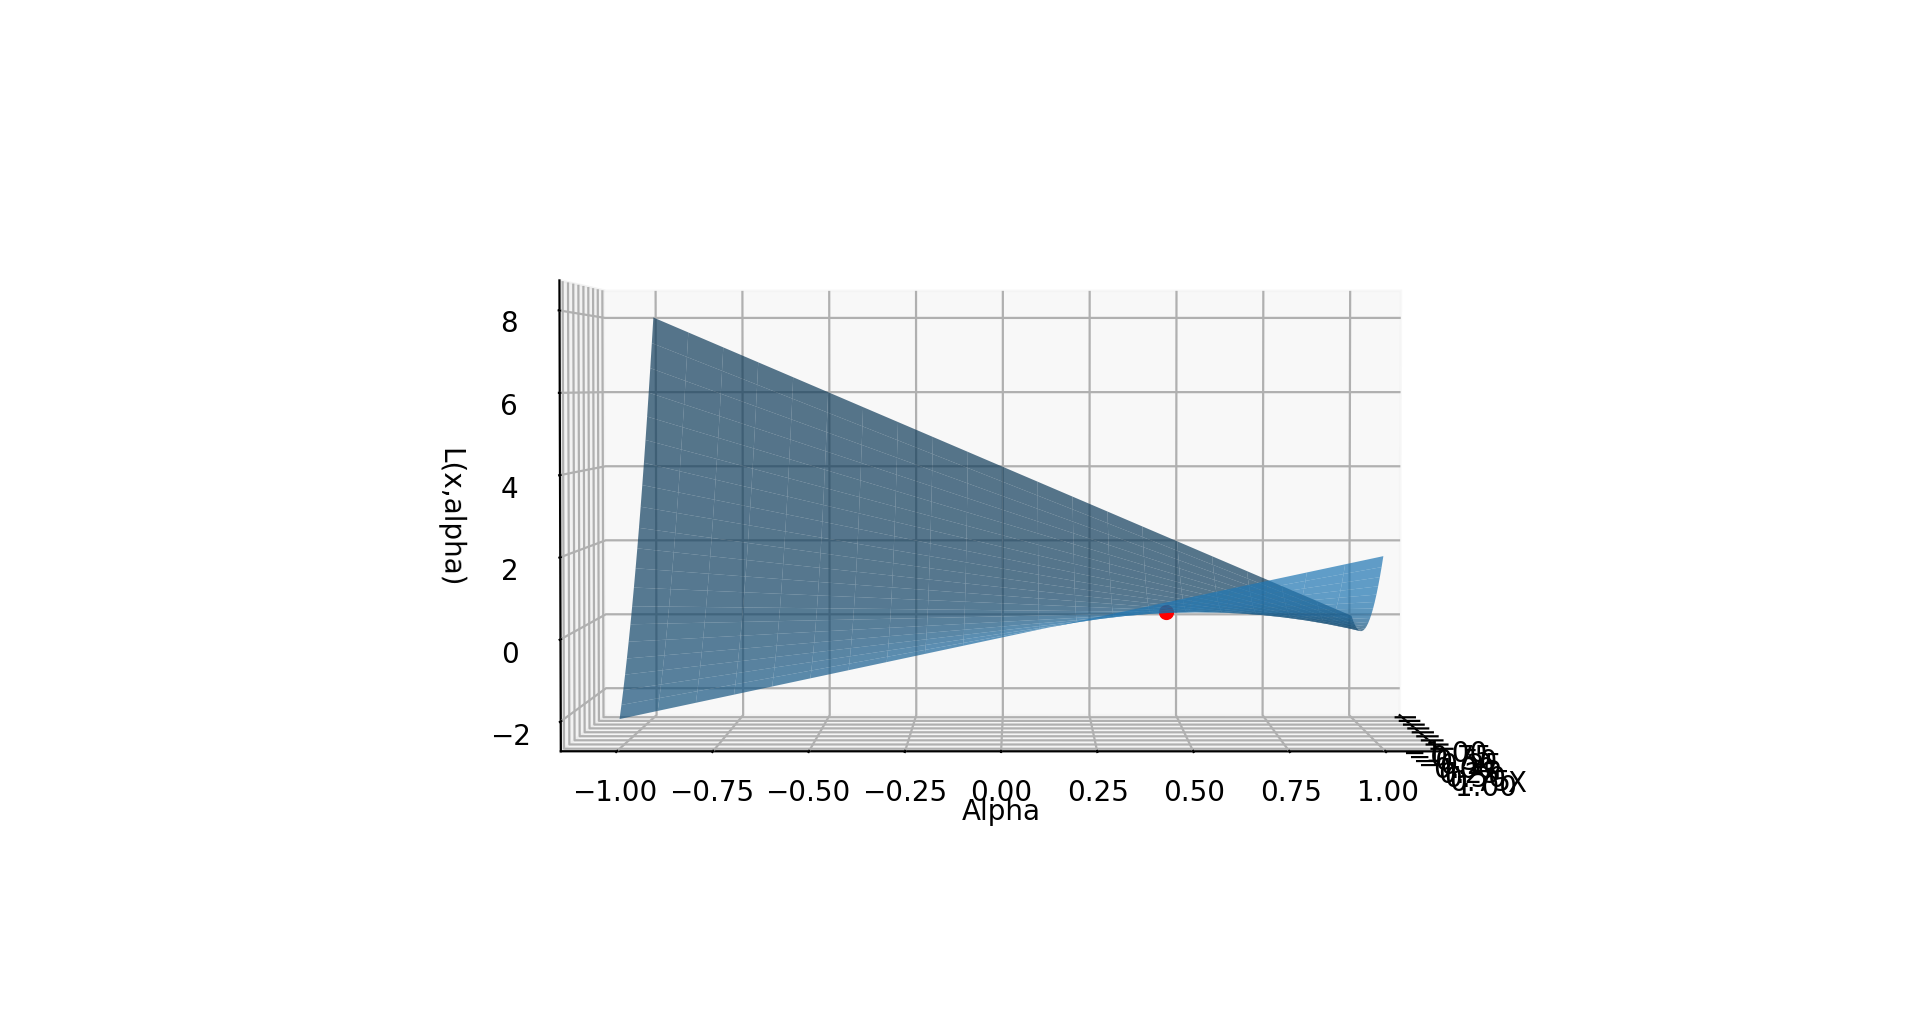

In [3]:
def L(x, a):
    return (x-1)**2 - a*(-3*x+1)


Xs = np.linspace(-1,1,21)
As = np.linspace(-1,1,21)

X, A = np.meshgrid(Xs, As)
F = L(X,A)
f_saddle_point = L(1/3, 4/9) 
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_surface(X, A, F,alpha = 0.7)
ax.set_xlabel("X")
ax.set_ylabel("Alpha")
ax.set_zlabel("L(x,alpha)")
ax.scatter([1/3],[4/9],f_saddle_point, color = "red", alpha =1)
plt.show()



### Solution of the Dual Problem

Dual function: $$g(\alpha) = \underset{x}{\min} L(x,a) = \underset{x}{\min} \left( (x-1)^2 - \alpha(-3x+1) \right)$$
Replace $x$ by $(*)$:
\begin{align*}g(\alpha) &= ((-\frac{3}{2} \alpha +1)-1)^2 - \alpha(-3(-\frac{3}{2} \alpha +1)+1))\\
&=\frac{9}{4} \alpha^2 - \alpha(\frac{9}{2}\alpha -2)\\
&=\frac{9}{4} \alpha^2 - \frac{9}{2}\alpha^2 +2\alpha)\\
&= -\frac{9}{4}\alpha^2 + 2\alpha
\end{align*} 


The dual function is given by $g(\alpha) = -\frac{9}{4}\alpha^2 + 2\alpha$. It is a quadratic function which is downwards opened. Connecting two points of the function will result in a line lieing under the graph. 

Dual problem: $$\underset{\alpha}{\max}g(\alpha) = \underset{\alpha}{\max} -\frac{9}{4}\alpha^2 + 2\alpha\\
\text{subject to } \alpha \geq 0$$ 

$$\frac{d g}{d \alpha} = -\frac{9}{2}\alpha + 2 $$
$$\frac{d g}{d^2 \alpha} = -\frac{9}{2}$$

Setting the derivative to zero:
\begin{align*}-\frac{9}{2}\alpha + 2 &= 0 \\
\alpha = \frac{4}{9} \end{align*}

The second derivative is always greater 0 thats why $\alpha = +\frac{4}{9}$ is a valid maximum of the dual problem $g(x)$. To derive the solution of the primal problem we can directly use $(*)$. $$ x =  -\frac{3}{2} \alpha +1 = \frac{1}{3}$$

The primal optimal objective and the dual optimal objective are equal, therefore we have strong duality.

### SVM by Hand

primal problem of the hard margin SVM:
\begin{align*}\underset{w \in \mathbb{R}^2, b \in \mathbb{R}}{minimize} \frac{1}{2} || w||^2\\
\text{subject to:} &-1(\langle w,(0,0)^T\rangle + b)\geq 1\\ 
&1(\langle w,(1,2)^T\rangle + b) \geq 1\\
&1(\langle w,(-1,2)^T\rangle + b)\geq 1\end{align*}

\begin{align*}L(w,b,\alpha) &= \frac{1}{2} || w||^2 - (\alpha_1(-1(\langle w,(0,0)^T\rangle + b) -1) + \alpha_2(1(\langle w,(1,2)^T\rangle + b) -1) + \alpha_3(1(\langle w,(-1,2)^T\rangle + b) -1)) \\
&= \frac{1}{2} || w||^2 - (-\alpha_1b - \alpha_1 + \alpha_2w_1 + 2\alpha_2w_2 + \alpha_2b - \alpha_2 - \alpha_3w_1 + 2\alpha_3w_2 + \alpha_3b - \alpha_3)\\
&= \frac{1}{2} || w||^2 + \alpha_1b + \alpha_1 - \alpha_2w_1 - 2\alpha_2w_2 - \alpha_2b + \alpha_2 + \alpha_3w_1 - 2\alpha_3w_2 - \alpha_3b + \alpha_3 \\
&= \frac{1}{2} \|| w||^2 + b(\alpha_1-\alpha_2-\alpha_3) + \langle w,(-\alpha_2+\alpha_3,-2\alpha_2-2\alpha_3)^T\rangle + \alpha_1 + \alpha_2 + \alpha_3 \end{align*}

The dimension of $w$ is 2, the dimension of $\alpha$ is 3.

\begin{align*}\frac{\partial L}{\partial b} = \alpha_1 - \alpha_2 - \alpha_3 \hspace{1cm} \text{(*)}\end{align*}
\begin{align*}\frac{\partial L}{\partial w} = w + (-\alpha_2+\alpha_3,-2\alpha_2-2\alpha_3)^T\hspace{1cm} \text{(**)}\end{align*}

At the solution of the primal the saddle point condition must hold:
\begin{align*}\frac{\partial L}{\partial b} = \alpha_1 - \alpha_2 - \alpha_3 = 0 \\
\frac{\partial L}{\partial w} = w + (-\alpha_2+\alpha_3,-2\alpha_2-2\alpha_3)^T = 0\\
w = (\alpha_2 - \alpha_3,2\alpha_2+2\alpha_3)^T
\end{align*}

Rewrite the Lagrangian by plugging in $(*)$ and $(**)$:
\begin{align*}
L(w,b,\alpha) &= \frac{1}{2} || w||^2 + b\underbrace{(\alpha_1-\alpha_2-\alpha_3)}_{=0\text{ by $(*)$}} + \langle w,(-\alpha_2+\alpha_3,-2\alpha_2-2\alpha_3)^T\rangle + \alpha_1 + \alpha_2 + \alpha_3 ) \\
&= \frac{1}{2} (5\alpha_2^2 -6\alpha_2\alpha_3+ 5\alpha_3) + \langle (\alpha_2 - \alpha_3,2\alpha_2+2\alpha_3)^T,(-\alpha_2+\alpha_3,-2\alpha_2-2\alpha_3)^T\rangle + \alpha_1 + \alpha_2 + \alpha_3\\
&= 2.5\alpha_2^2 +3\alpha_2\alpha_3+ 2.5\alpha_3 + (-5\alpha_2^2 -6\alpha_2\alpha_3 - 5\alpha_3^2) + \alpha_1 + \alpha_2 + \alpha_3\\
&= -2.5\alpha_2^2 -3\alpha_2\alpha_3 - 2.5\alpha_3^2 + \alpha_1 + \alpha_2 + \alpha_3\\
&= L(w^*,b^*,\alpha) 
\end{align*}  


The dual function is given by:
$$g(\alpha) = -2.5\alpha_2^2 -3\alpha_2\alpha_3 - 2.5\alpha_3^2 + \alpha_1 + \alpha_2 + \alpha_3$$
and the dual problem by:
$$\underset{\alpha}{\max}g(\alpha) = \underset{\alpha}{\max} -2.5\alpha_2^2 -3\alpha_2\alpha_3 - 2.5\alpha_3^2 + \alpha_1 + \alpha_2 + \alpha_3\\
\text{subject to } \alpha \geq 0\\
\alpha_1 - \alpha_2 - \alpha_3 = 0 \rightarrow \alpha_1 = \alpha_2 + \alpha_3
$$ 

$$\underset{\alpha}{\max}g(\alpha) = \underset{\alpha}{\max} -2.5\alpha_2^2 -3\alpha_2\alpha_3 - 2.5\alpha_3^2 + 2\alpha_2 + 2\alpha_3\\
\text{subject to } \alpha \geq 0
$$ 

$$\frac{\partial L}{\partial a_2} = -5a_2 - 3a_3 + 2 = 0 \rightarrow a_2 = \frac{2}{5}-\frac{3}{5}a_3\\
\frac{\partial L}{\partial a_3} = -5a_3 - 3a_2 + 2 = 0$$

Insert $a_2$ in the second derivative: 
$$ -5a_3 - 3(\frac{2}{5}-\frac{3}{5}a_3) + 2 = 0 \\
-5a_3 - 1\frac{1}{5} + 1\frac{4}{5}a_3 + 2 = 0\\
-3\frac{1}{5}a_3 = -\frac{4}{5}\\
a_3 = 0.25 \rightarrow a_2 = 0.25 \rightarrow a_1 = 1$$

Recover the primal optimal variables from the dual solution $\alpha$:

$$w_1 = 0.25 \cdot 1 + 0.25 \cdot -1 = 0 \\
w_2 = 0.25 \cdot 2 + 0.25 \cdot 2  =1$$

We consider a point $X_2$ for which the active constraint holds. From the KKT conditions we infer:

$$b = 1 - (0.25 \cdot 5 + 0.25 \cdot 3) = -1$$

In [4]:
xs = [(0,0), (1,2), (-1,2)]
ys = [-1, 1, 1]

In [5]:
model = SVC(kernel = 'linear')
model.fit(xs,ys)

print("Weights (w): ", model.coef_)
print("Product (y_ia_i): ", model.dual_coef_)
print("Intercept (b): ",model.intercept_)

Weights (w):  [[  3.84000000e-04   1.00019200e+00]]
Product (y_ia_i):  [[-0.500096  0.25024   0.249856]]
Intercept (b):  [-1.000256]


The analytic solution and the computed values are nearly the same. They differ in some digits after the decimal point. This is caused by rounding errors of the representable IEEE 754 single precision floating point numbers.

A support vector is a point lieing exactly on the margin, inside the margin, or on the wrong side of the hyperplane. Only these points have $\alpha$-values $\neq 0$. In our case condition is met by all three points, which gives us three support vectors. In order two reduce the number of support vectors to exactly two we add the points $(1,1.5)$ and $(1,0.5)$ with $Y = 1$ and $Y = -1$ respectivley. The new values of $\alpha$ are given w.l.o.g. by $a_1 = -1$, $a_2 = 1$.

In [6]:
xs = [(0,0), (1,2), (-1,2), (1,1.5), (1,0.5)]
ys = [-1, 1, 1, 1, -1]

model = SVC(kernel = 'linear')
model.fit(xs,ys)

print("Weights (w): ", model.coef_)
print("Product (y_ia_i): ", model.dual_coef_)
print("Intercept (b): ",model.intercept_)

Weights (w):  [[ 0.  1.]]
Product (y_ia_i):  [[-1.  1.]]
Intercept (b):  [-1.]
